### Import custom modules from current folder

In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import nltk
from text_easability_metrics import TextEasabilityMetrics, StanfordNLP
from simple_text_representation.classes import Text
from simple_text_representation.models import Database
from nltk.tree import Tree
import pandas as pd
# from nltk.draw.tree import draw_trees

In [3]:
database = Database('educationalTexts', 'postgres', '', '0.0.0.0', 5432)
path = r'/Users/herbert/Projects/Tesis/stanford-corenlp-full-2017-06-09'
path = r'http://corenlp.run'
path = r'http://localhost/'

In [4]:
metrics = TextEasabilityMetrics(path, port=9000)

TextEasabilityMetrics


In [5]:
firstTestText = Text.getText(database, 1)

##### StanfordNLP test

In [6]:
stanfordNLP = StanfordNLP(language='es')

### Text easability analysis

In [7]:
firstTestText

[['Por lo tanto, las campañas públicas deben esclarecer la naturaleza de los procedimientos técnicos y legales, para disipar miedos; pero, esencialmente, deben apuntar a que se tome conciencia de lo que significa salvar otra vida, porque para decidirlo en un momento crucial es necesario que la idea se haya considerado y discutido previamente, con reflexión y calma.'],
 ['La última cuestión es la más compleja; en la actualidad, aunque alguien haya manifestado expresamente su voluntad de donar, es a la familia a la que se consulta en el momento en que la donación puede efectuarse.',
  ' Como se entiende, tal consulta llega en un momento difícil y poco propicio para las reflexiones profundas, más aún si se tiene que tomar una decisión rápida.'],
 ['Es preciso, entonces, que se aclaren algunas dudas para que las personas pierdan el miedo a donar.',
  ' Primero, que lo complicado de los procedimientos de extirpación y trasplantación, en el que intervienen varios equipos médicos altamente es

In [22]:
testSentence = 'Como se entiende, tal consulta llega en un momento difícil y poco propicio para las reflexiones profundas, más aún si se tiene que tomar una decisión rápida.'
# testSentence = firstTestText[1][0]
testSentence

# corpus = nltk.corpus.conll2002
# sentenceGrammar = corpus.chunked_sents('esp.train')[2]
# sentence= corpus.sents('esp.train')[2]

# parser = nltk.ChartParser(sentenceGrammar)
# for doc in parser.parse(sentence):
#     print(doc)


'Como se entiende, tal consulta llega en un momento difícil y poco propicio para las reflexiones profundas, más aún si se tiene que tomar una decisión rápida.'

In [23]:
treeTest = stanfordNLP.parse(testSentence)

In [24]:
parseSentence = metrics.syntaxisSimplicity(testSentence)
parseSentence

21

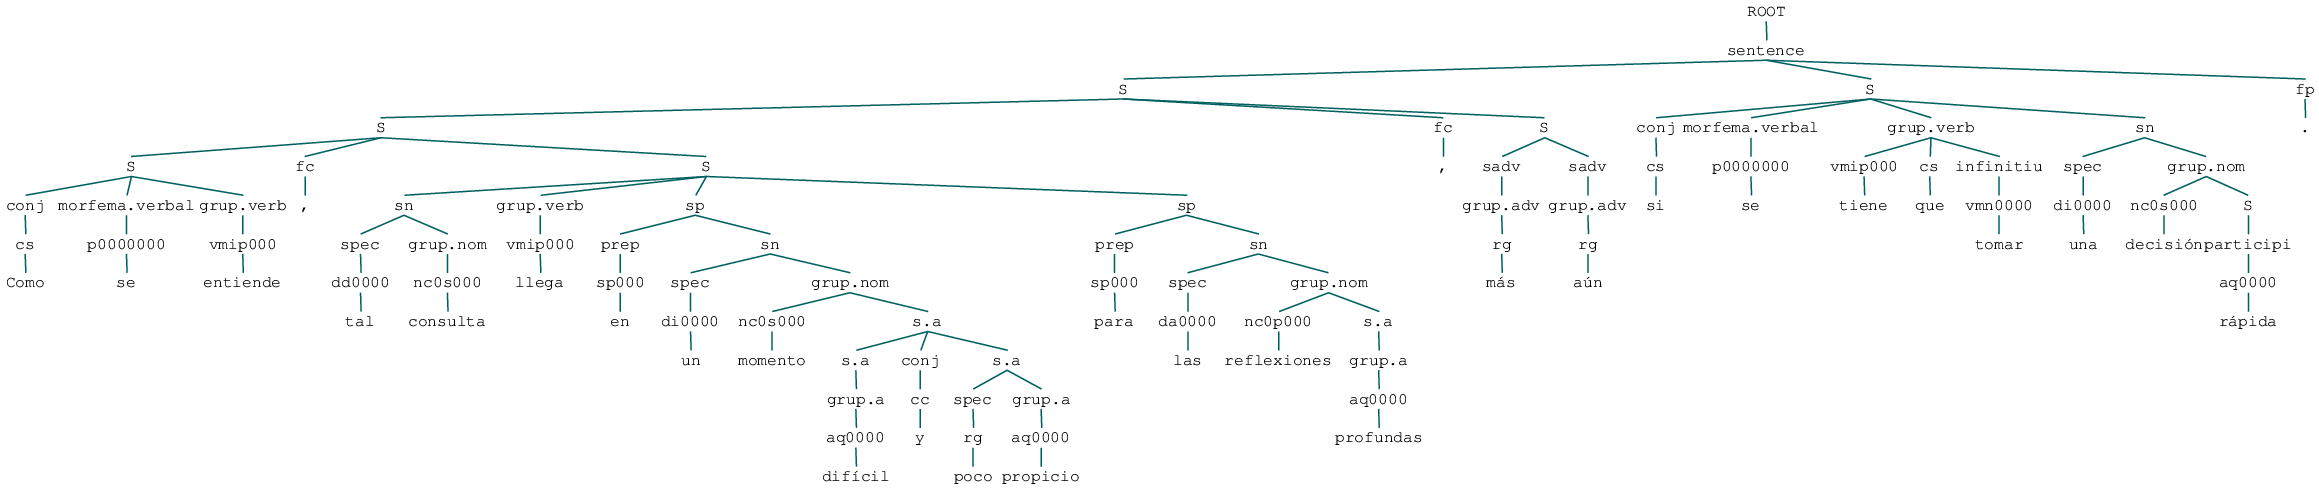

In [25]:
tree = Tree.fromstring(treeTest)
tree

In [17]:
# text = firstTestText
# treeArr = list()

# for paragraph in text:
#     for sentence in paragraph:
#         parseS = stanfordNLP.parse(sentence)
#         treeP = Tree.fromstring(parseS)
#         treeArr.append(treeP)

In [13]:
# treeArr[0]

In [14]:
def isSpecialChar(leave):
    return not leave.isalnum()

In [15]:
def getMainVerbRecursive(treePP, currentDeep, wordsCount, isMainVerbFound):
    wordsCountPP = wordsCount

    if(isinstance(treePP, Tree) and len(treePP) == 1) and treePP.height() == 2 and not isMainVerbFound:
#         print(treePP)
#         print(currentDeep)
        verbFound = treePP.label().startswith("v")
        wordsCountPP = wordsCountPP + (1 if not verbFound else 0)

        return currentDeep, wordsCountPP, verbFound
    else:
        partialDeep = 10000
        for index in range(len(treePP)):
            subTreeP = treePP[index]
            deepPP, wordsCountPP, mainVerFound = getMainVerbRecursive(subTreeP, currentDeep + 1, wordsCountPP, isMainVerbFound);
            if (mainVerFound and deepPP < partialDeep): partialDeep = deepPP
        return partialDeep, wordsCountPP, mainVerFound

    return currentDeep, wordsCount, isMainVerbFound

In [16]:
def getMainVerb(treeParam):
    currentDeep = 10000
    numOfWords = 0
    indexFound  = -1
    arrOfNumWords = list()
    
    for j in range(len(treeParam)):
#         print('-------------------------------------------------------------------------------------')
#         print(j)
#         print(treeParam[j])
#         print('leaves', len(treeParam[j].leaves()))
        isFound = False
        newDeep, numWordsBefore, isFound = getMainVerbRecursive(treeParam[j], 1, 0, isFound)

        if (not isFound):
            numWordsBefore = len([leave for leave in treeParam[j].leaves() if not isSpecialChar(leave)])

        arrOfNumWords.append(numWordsBefore)

        if (isFound and newDeep < currentDeep):
            indexFound = j
            currentDeep = newDeep

#         print(isFound, numWordsBefore, newDeep, currentDeep, indexFound)
#         print('====================================================================================')

#     print(arrOfNumWords, indexFound)
    numOfWords =  sum(arrOfNumWords[:indexFound]) if indexFound >= 0 else sum(arrOfNumWords)
    return numOfWords

In [17]:
# # firstTestText
# testSentence = firstTestText[0][0]
# print(testSentence)

# exampleTree = Tree.fromstring(stanfordNLP.parse(testSentence))
# print(metrics.syntaxisSimplicity(testSentence))
# exampleTree

# # for index in range(len(treeTT)):
# #     subTT = treeTT[index]
# #     print(len(subTT))
# #     print(subTT.pos())
# #     print(isinstance(subTT[0], Tree))

# #     print('---------------------------------------------------------------------------------------------------------')

### Test the metric in all the text

In [18]:
# dfSeventh = pd.read_csv('../files/textsSeventhgrade.csv')
# dfEighth = pd.read_csv('../files/textsEighthgrade.csv')
# dfNinth = pd.read_csv('../files/textsNinthgrade.csv')
# dfTenth = pd.read_csv('../files/textsTenthGrade.csv')
# dfEleventh = pd.read_csv('../files/textsEleventhgrade.csv')

In [19]:
# groupedSeventh = dfSeventh.groupby('id').apply(lambda x: "%s" % ''.join(x['value']))
# groupedEighth = dfEighth.groupby('id').apply(lambda x: "%s" % ''.join(x['value']))
# groupedNinth = dfNinth.groupby('id').apply(lambda x: "%s" % ''.join(x['value']))
# groupedTenth = dfTenth.groupby('id').apply(lambda x: "%s" % ''.join(x['value']))
# groupedEleventh = dfEleventh.groupby('id').apply(lambda x: "%s" % ''.join(x['value']))

In [20]:
# len(groupedSeventh.values)

In [21]:
# textOfSeventhGrade = groupedSeventh.values
# textOfEightGrade = groupedEighth.values
# textOfNineGrade = groupedNinth.values
# textOfTenthGrade = groupedTenth.values
# textOfEleventhGrade = groupedEleventh.values

In [22]:
textOfSeventhGrade = Text.getTexts(database, grade=7)
textOfEightGrade = Text.getTexts(database, grade=8)
textOfNineGrade = Text.getTexts(database, grade=9)
textOfTenthGrade = Text.getTexts(database, grade=10)
textOfEleventhGrade = Text.getTexts(database, grade=11)

In [25]:
def getSSfromTexts(texts):
    results = list()

    for text in texts:
        meanValueParagraph = list()
        for paragraph in text:
            meanValueSentence = list()
            for sentence in paragraph:
                numWordsBefore = metrics.syntaxisSimplicity(sentence)
                meanValueSentence.append(numWordsBefore)
            meanValueParagraph.append(sum(meanValueSentence)/len(meanValueSentence))
        meanValueText = sum(meanValueParagraph)/len(meanValueParagraph)
        results.append(meanValueText)

    return results

In [26]:
resultsSG = getSSfromTexts(textOfSeventhGrade)

In [27]:
resultsEgG = getSSfromTexts(textOfEightGrade)

In [28]:
resultsNG = getSSfromTexts(textOfNineGrade)

In [29]:
resultsTG = getSSfromTexts(textOfTenthGrade)

In [30]:
resultsEG = getSSfromTexts(textOfEleventhGrade)

In [31]:
sumResultsSG = sum(resultsSG)
meanResultsSG = sum(resultsNG)/len(resultsSG)
print(sum(resultsSG))
print(len(resultsSG))
print(sum(resultsNG)/len(resultsSG))

199.74781492804047
45
2.777153415238149


In [32]:
sumResultsEgG = sum(resultsEgG)
meanResultsEgG = sum(resultsEgG)/len(resultsEgG)
print(sum(resultsEgG))
print(len(resultsEgG))
print(sum(resultsEgG)/len(resultsEgG))

264.619847555557
58
4.562411164750983


In [33]:
sumResultsNG = sum(resultsNG)
meanResultsNG = sum(resultsNG)/len(resultsNG)
print(sum(resultsNG))
print(len(resultsNG))
print(sum(resultsNG)/len(resultsNG))

124.9719036857167
31
4.031351731797312


In [34]:
sumResultsTG = sum(resultsTG)
meanResultsTG = sum(resultsTG)/len(resultsTG)
print(sum(resultsTG))
print(len(resultsTG))
print(sum(resultsTG)/len(resultsTG))

146.9496825655911
29
5.067230433296245


In [35]:
sumResultsEG = sum(resultsEG)
meanResultsEG = sum(resultsEG)/len(resultsEG)
print(sum(resultsEG))
print(len(resultsEG))
print(sum(resultsEG)/len(resultsEG))

272.97106295004403
35
7.799173227144115


In [36]:
resultsTotal = [sumResultsSG, sumResultsEgG, sumResultsNG, sumResultsTG, sumResultsEG]
resultsMean = [meanResultsSG, meanResultsEgG, meanResultsNG, meanResultsTG, meanResultsEG]
resultsTotal

[199.74781492804047,
 264.619847555557,
 124.9719036857167,
 146.9496825655911,
 272.97106295004403]

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [40]:
sns.set_style("whitegrid")

data = np.array(resultsMean).reshape((1, len(resultsMean)))
labels = ['Primero', 'Segundo', 'Tercero', 'Cuarto', 'Quinto']
df = pd.DataFrame(data, columns=labels)
df
# ax = sns.barplot(data=df)

,Primero,Segundo,Tercero,Cuarto,Quinto
0,2.777153,4.562411,4.031352,5.06723,7.799173
